In [1]:
import matplotlib.pyplot as plt
import numpy as np

import optical_gating_analysis as OG
from tqdm import tqdm

from scipy.stats import gaussian_kde

In [39]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif")
#oog.sequence_manager.set_reference_sequence(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif")
#oog.sequence_manager.reference_period = 73.106274
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Reference period: 73.62612008708606; Reference indices: [33, 111]


Getting phases: 100%|██████████| 37970/37970 [00:00<00:00, 186065.91it/s]


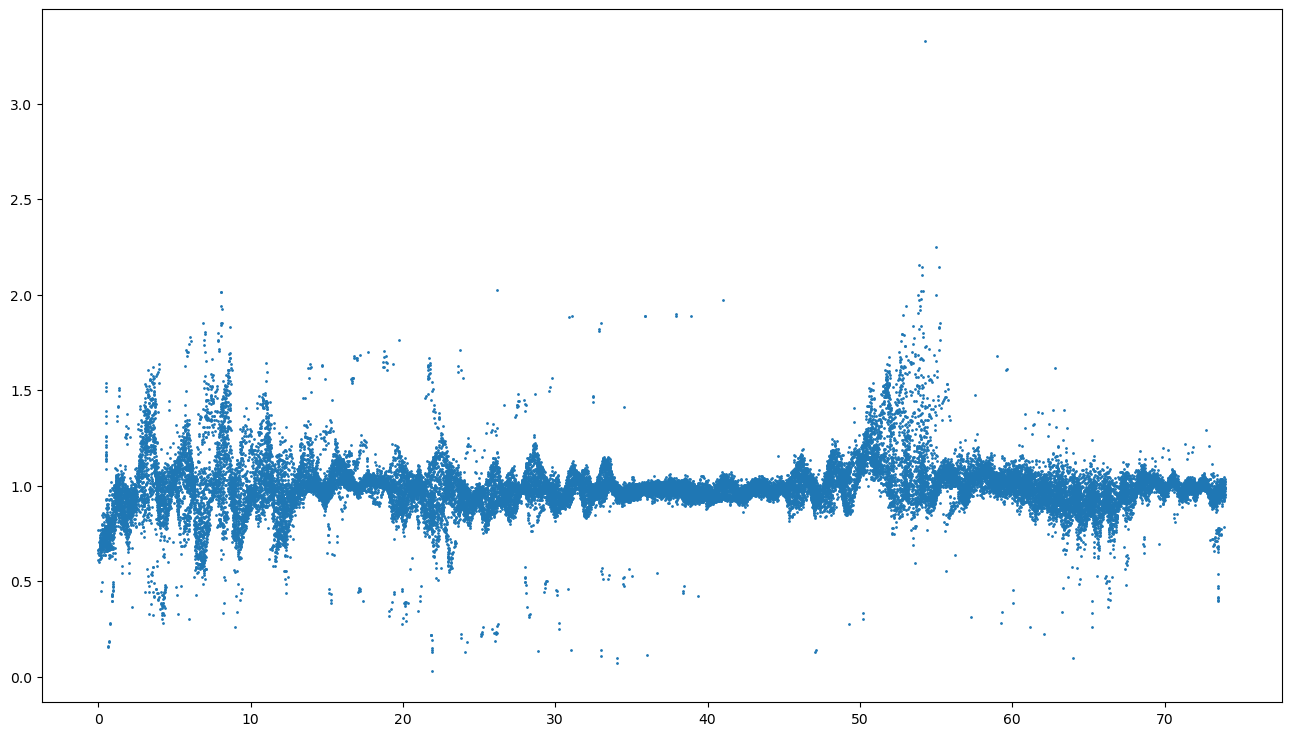

In [40]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases_frames[1::], oog.delta_phases_frames, s = 1)
plt.show()

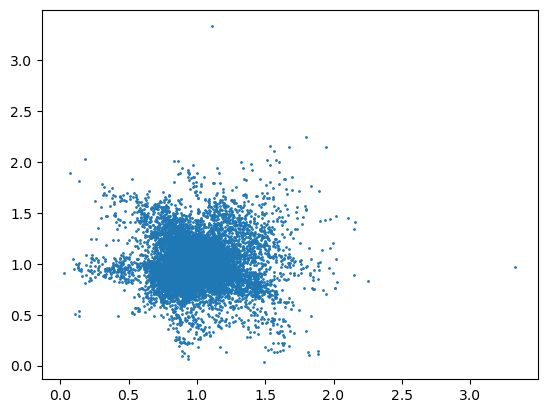

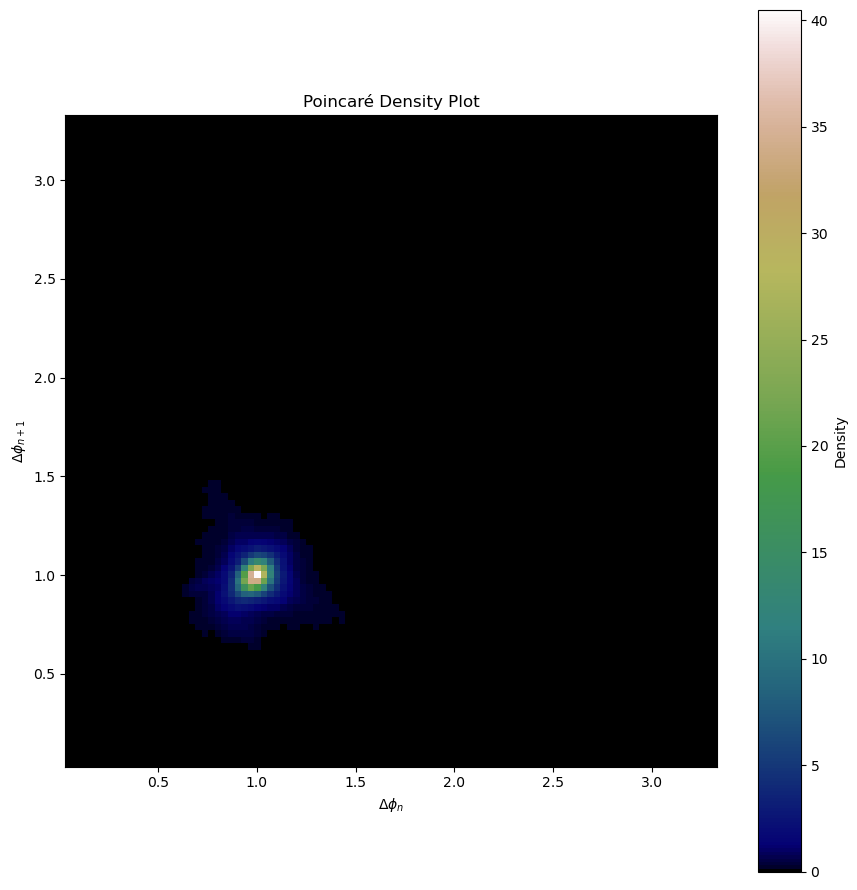

In [50]:
plt.scatter(oog.delta_phases_frames[0:-1], oog.delta_phases_frames[1::], s = 1)
plt.show()

import hrv_analysis as hrv
hrv.poincare_plot(oog.delta_phases_frames)
plt.show()

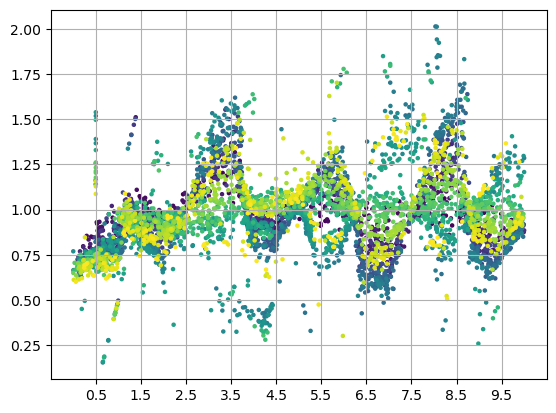

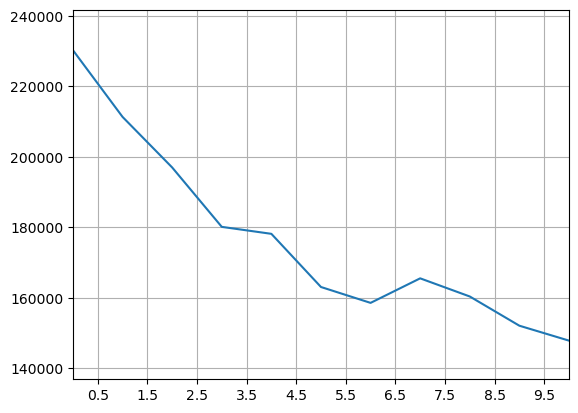

In [118]:
startat = 0
endat = 10
major_ticks = np.linspace(startat + 0.5, endat - 0.5, endat - startat)

loc = np.where((oog.phases_frames[1::] > startat) & (oog.phases_frames[1::] < endat))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(oog.phases_frames[1::][loc], oog.delta_phases_frames[loc], s = 5, c = range(len(oog.phases_frames[1::][loc])))
ax.set_xticks(major_ticks)
plt.grid()
plt.show()

diffs = np.sum(np.abs(np.diff(oog.sequence_manager.reference_sequence.astype(np.int64), axis = 0)), axis = (1,2))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(diffs)
ax.set_xticks(major_ticks)
plt.xlim(startat, endat)
plt.ylim(np.min(diffs[startat:endat]) * 0.9, np.max(diffs[startat:endat]) * 1.05)
plt.grid()

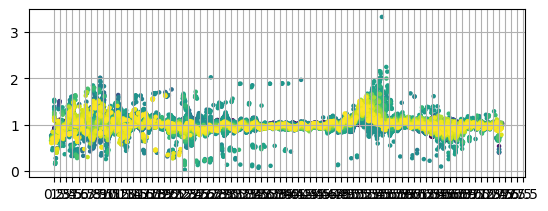

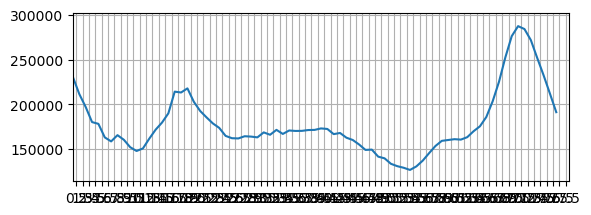

In [129]:
startat = 0
endat = oog.sequence_manager.reference_sequence.shape[0]
major_ticks = np.linspace(startat + 0.5, endat - 0.5, endat - startat)

loc = np.where((oog.phases_frames[1::] > startat) & (oog.phases_frames[1::] < endat))
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.scatter(oog.phases_frames[1::][loc], oog.delta_phases_frames[loc], s = 5, c = range(len(oog.phases_frames[1::][loc])))
ax.set_xticks(major_ticks)
plt.grid()

diffs = np.sum(np.abs(np.diff(oog.sequence_manager.reference_sequence.astype(np.int64), axis = 0)), axis = (1,2))
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.plot(diffs)
ax.set_xticks(major_ticks)
plt.xlim(startat, endat)
plt.ylim(np.min(diffs[startat:endat]) * 0.9, np.max(diffs[startat:endat]) * 1.05)
plt.grid()

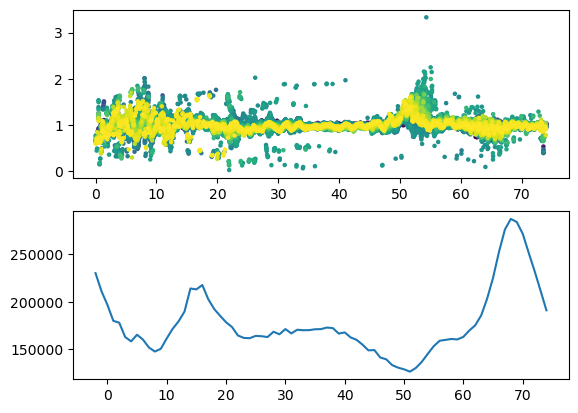

In [137]:
plt.subplot(2, 1, 1)
plt.scatter(oog.phases_frames[1::][loc], oog.delta_phases_frames[loc], s = 5, c = range(len(oog.phases_frames[1::][loc])))
plt.subplot(2, 1, 2)
plt.plot(np.arange(-2, oog.sequence_manager.reference_sequence.shape[0] - 2 - 1), diffs)
plt.show()